<a href="https://colab.research.google.com/github/dbahiense/MachineLearning/blob/main/01iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Predição Multiclasse

---

## Mantra

1. Definir problema;
2. Configurar sistema;
3. Obter dados;
4. Entender dados;
5. Preparar dados;
6. Fatiar dados (em dados de treino e dados teste);
7. Selecionar algoritmos;
8. Avaliar algoritmos;
9. Testar melhor algoritmo (com os dados de teste);
10. Ajustar parâmetros do melhor algoritmo para melhorar resultados;
11. Apresentar resultados;
12. Utilizar modelo em novos dados.

# Preparação

---

## 1. Definir Problema

## 2. Configurar Sistema

### 2.1 Instalar softwares

### 2.2 Verificar versões

In [1]:
#Python
import sys
print('Python: {}'.format(sys.version))

#scipy
import scipy
print('scipy: {}'.format(scipy.__version__))

#numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

#matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

#pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


### 2.3 Importar bibliotecas e módulos

In [2]:
#importar bibliotecas e módulos necessários
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Dados

---

## 3. Obter Dados

In [3]:
#endereço dos dados originais
#pode ser modificado para endereço local na própria máquina
url = "https://gist.githubusercontent.com/dbahiense/370f4406813b4820a26f85c27c9b3f25/raw/2e2930cb8329356eff01696aacb79a1773aa9daa/iris.csv"

#nome dos atributos
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

#lê o arquivo
data = read_csv(url, names=columns)

## 4. Entender dados

### 4.1 Análise descritiva

In [4]:
#mostra o formato/tamanho dos dados
shape = data.shape #(linhas, colunas)
shape

(150, 5)

In [5]:
#mostra as primeiras n instâncias dos dados
peek = data.head() #head(n) para mostrar as primeiras n linhas, default n = 5
peek

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#alternativamente pode-se também mostrar as últimas n instâncias dos dados
peek = data.tail() #tail(n) para mostrar as últimas n linhas, default n = 5
peek

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
#mostra os tipos de dados de cada atributo (coluna)
types = data.dtypes
types

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

### 4.2 Análise estatística dos atributos

In [8]:
#mostra os dados estatísticos de cada atributo (coluna)
description = data.describe()
description

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#mostra a correlação entre os atributos
#métodos podem ser: pearson, spearman ou kendall
correlations = data.corr(method = 'pearson')
correlations

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [10]:
#mostra a distorção (obliquidade) das distribuições univariadas
skew = data.skew(numeric_only=True)
skew

sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
dtype: float64

In [11]:
#mostra a distribuição por classe (em caso de problemas de classificação)
class_distrib = data.groupby('class').size()
class_distrib

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### 4.3 Visualização dos dados

#### 4.3.1 Gráficos univariados

##### **Histograma**

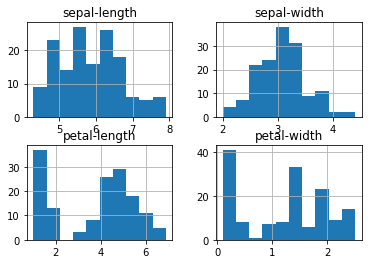

In [12]:
data.hist()
pyplot.show()

##### **Gráficos de densidade**

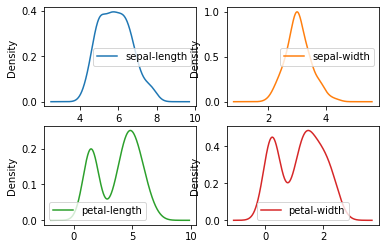

In [13]:
data.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
pyplot.show()

##### **Box plot**

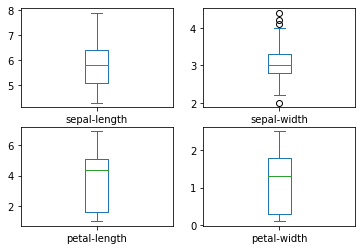

In [14]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

#### 4.3.2 Gráficos multivariados

##### **Matriz de Correlação**

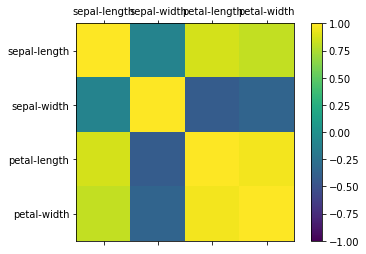

In [15]:
#matriz de correlação
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()

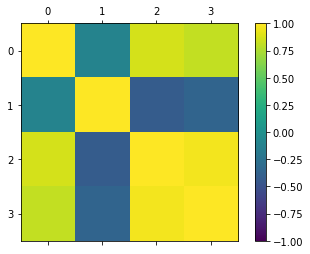

In [16]:
#matriz de correlação mais simples
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

##### **Scatter Plot**

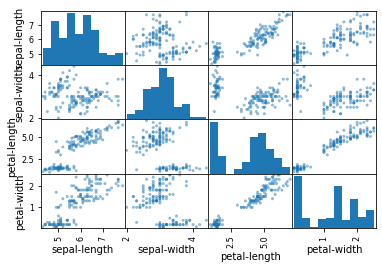

In [17]:
scatter_matrix(data)
pyplot.show()

## 5. Preparar Dados

O conjunto de dados está bem balanceado e não apresenta valores faltantes nem redundantes.  
Por isso não necessitamos de nenhuma preparação de dados.

## 6. Fatiar dados

In [18]:
#separar dados para testes
#dispõe os dados em forma de array
array = data.values

#fatia os dados em um conjunto de inputs X e outro de output Y
X = array[ : , 0:4]
Y = array[ : , 4]

#From documentation: split array or matrix into random train and test subsets
test_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

**notas**

---  
`X = array[ : , 0:4]` trata-se de um fatiamento (slice) no formato `[start, stop]`.  
Nesse caso, `start = : ` significa `start` da primeira à última linha e  
`stop = 0:4` significa `stop`da primeira à quarta coluna, ou melhor dizendo, da coluna de índice 0 à coluna de índice 3.  
Não podemos nos esquecer que no caso do Python os intervalos geralmente são [fechados, abertos[. 

https://docs.python.org/3/tutorial/introduction.html#lists
  
---
`train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Algoritmos

---

## 7. Selecionar algoritmos

In [19]:
#seleção de algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

**notas**

---
Por que selecionamos esses algoritmos?

## 8. Avaliar algoritmos

8.1 Avaliar algoritmos

In [20]:
#avaliar um algoritmo de cada vez
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  # msg = f'{name}: {cv_results.mean()} ({cv_results.std()})'
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.958333 (0.055902)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.991667 (0.025000)


### 8.2 Comparar graficamente os algoritmos

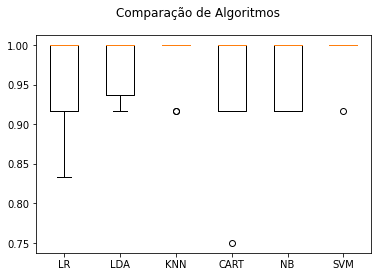

In [21]:
#comparação gráfica da eficiência dos algoritmos
fig = pyplot.figure()
fig.suptitle('Comparação de Algoritmos')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 9. Testar melhor algoritmo

In [22]:
#fazer predições usando os dados de teste
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

